<a href="https://colab.research.google.com/github/oat3134/logi-skk-arduino/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
!unzip -q "/content/MyDataset.zip" -d "/content/datasets"
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

!yolo detect train model=yolov8n.pt data=/content/datasets/MyDataset/data.yaml epochs=50 imgsz=640 batch=-1

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/MyDataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

In [3]:
from ultralytics import YOLO

# 1. โหลดโมเดล
model = YOLO('yolov8n.pt')

# 2. สั่งเทรนแบบ "มาราธอน"
model.train(
    data='/content/datasets/MyDataset/data.yaml',

    # --- จุดสำคัญ 1: ตั้งรอบไว้เยอะๆ ให้เหมือนไม่มีวันจบ ---
    epochs=5000,

    # --- จุดสำคัญ 2: ปิดระบบหยุดอัตโนมัติ (Early Stopping) ---
    # ปกติถ้ามันไม่ฉลาดขึ้น 50 รอบมันจะตัดจบ แต่เราตั้ง 0 เพื่อบอกว่า "ห้ามหยุดนะ ฉันจะหยุดเอง"
    patience=0,

    imgsz=640,
    batch=-1,

    # ลูกเล่นเสริม (หมุนภาพ/กลับด้าน) ให้มันเรียนรู้ยากขึ้น จะได้เก่งขึ้น
    degrees=15.0,
    fliplr=0.5,
    mosaic=1.0,

    # เซฟทุกๆ 10 รอบ (กันเหนียว)
    save_period=10
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/MyDataset/data.yaml, degrees=15.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=5000, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, img

KeyboardInterrupt: 

กำลังทดสอบกับรูป: /content/datasets/MyDataset/val/images/WIN_20260201_17_40_08_Pro (2).jpg

image 1/1 /content/datasets/MyDataset/val/images/WIN_20260201_17_40_08_Pro (2).jpg: 384x640 1 pen, 1 glasses, 41.2ms
Speed: 2.9ms preprocess, 41.2ms inference, 17.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict
ผลลัพธ์การตรวจจับ:


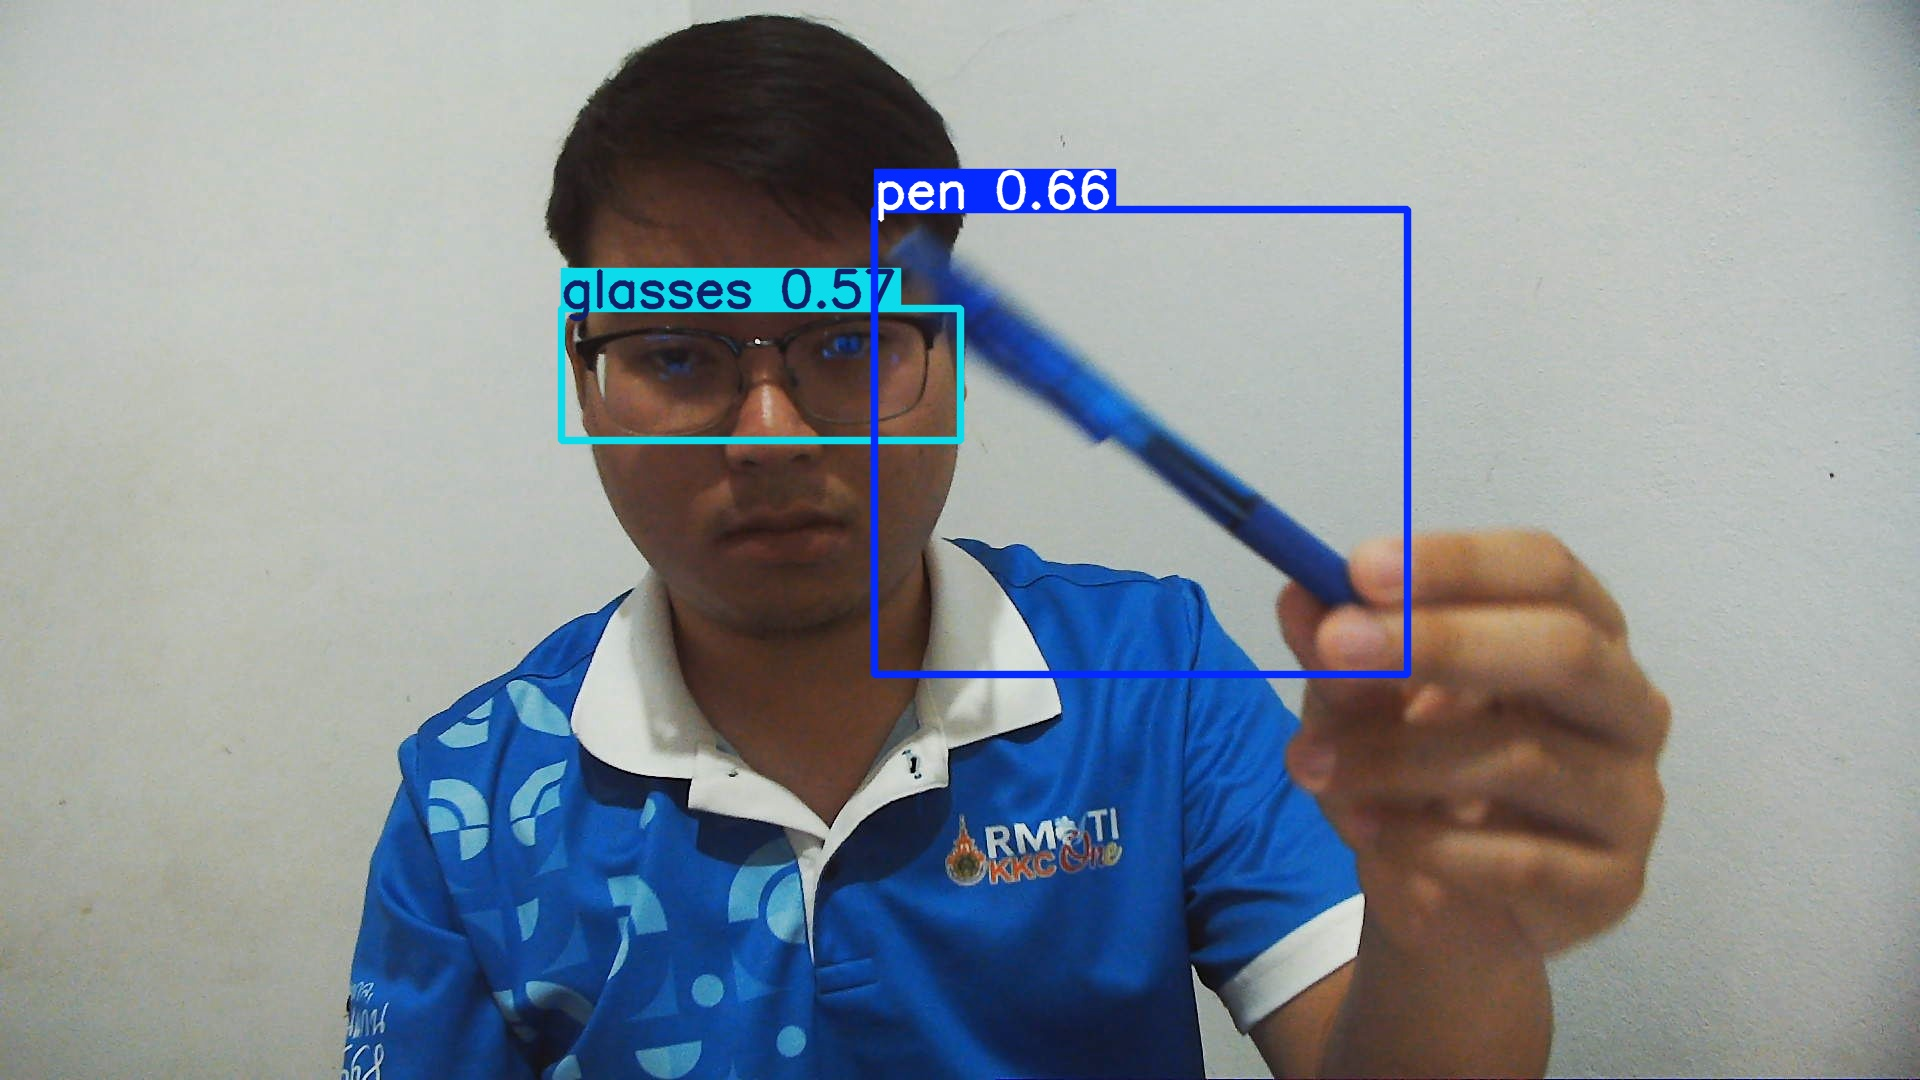

In [ ]:
from ultralytics import YOLO
import glob
import random  # <--- เพิ่มตัวช่วยสุ่ม
from IPython.display import Image, display

# 1. โหลดโมเดลตัวล่าสุด (last.pt) แทน best.pt
# (เพราะ best.pt อาจจะไม่ถูกอัปเดตถ้า Validation พัง)
model = YOLO('/content/runs/detect/train2/weights/last.pt')

# 2. เอารูปในเครื่องมาลองทายดูสักรูป
# (ดึงรูปจากโฟลเดอร์ train มาเทส)
test_images = glob.glob('/content/datasets/MyDataset/val/images/*.jpg')

if test_images:

    # --- จุดที่แก้: สุ่มเลือกรูปมา 1 รูป ---
    target_image = random.choice(test_images)
    print(f"กำลังทดสอบกับรูป: {target_image}")
    # -----------------------------------

    # ให้ AI ทายผล
    results = model.predict(source=target_image, save=True)

    # โชว์รูปผลลัพธ์
    print("ผลลัพธ์การตรวจจับ:")
    display(Image(filename=results[0].save_dir + '/' + results[0].path.split('/')[-1]))
else:
    print("หาไฟล์รูปไม่เจอครับ")